In [1]:
from IPython.display import display, clear_output
import pandas as pd
import matplotlib.pyplot as plt


predictions_df = pd.read_csv("predictions.csv")
predictions_df

,img_path,pred_x,pred_y,true_x,true_y,distance
0,Dataset/1757521089487.jpg,0.270936,0.745972,0.843690,0.027084,0.919156
1,Dataset/1755731347732.jpg,0.366781,0.712611,0.965451,0.030990,0.907200
2,Dataset/1755777768557.jpg,0.367586,0.745384,0.975224,0.080370,0.900815
3,Dataset/1755730156402.jpg,0.404018,0.771208,0.953121,0.058839,0.899436
4,Dataset/1757583576916.jpg,0.316671,0.771568,0.893344,0.084681,0.896864
...,...,...,...,...,...,...
5462,Dataset/1755731316970.jpg,0.528890,0.540329,0.535988,0.527359,0.014785
5463,Dataset/1755730191211.jpg,0.515242,0.545986,0.528979,0.544116,0.013863
5464,Dataset/1755777826378.jpg,0.517389,0.639990,0.508563,0.649202,0.012758
5465,Dataset/1757583666531.jpg,0.522044,0.565934,0.509736,0.566274,0.012312


In [2]:
def display_image_with_preds(idx):
    row = predictions_df.iloc[idx]
    img_path = row['img_path']
    pred_x, pred_y = row['pred_x'], row['pred_y']
    true_x, true_y = row['true_x'], row['true_y']

    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    # Show image on the left
    img = plt.imread(img_path)
    axs[0].imshow(img)
    axs[0].set_title(f"Image: {img_path.split('/')[-1]}")
    axs[0].axis('off')

    # Show prediction and ground truth on the right
    axs[1].plot(1 - pred_x, 1 - pred_y, 'ro', label='Prediction', markersize=10)
    axs[1].plot(1 - true_x, 1 - true_y, 'go', label='Ground Truth', markersize=10)
    axs[1].set_xlim(0, 1)
    axs[1].set_ylim(0, 1)
    axs[1].set_aspect('equal', adjustable='box')
    axs[1].set_xticks([0, 1])
    axs[1].set_yticks([0, 1])
    axs[1].set_title(f"Pred (red): ({pred_x:.2f}, {pred_y:.2f})\nTrue (green): ({true_x:.2f}, {true_y:.2f})")
    axs[1].legend()

    plt.tight_layout()
    plt.show()

    return img_path

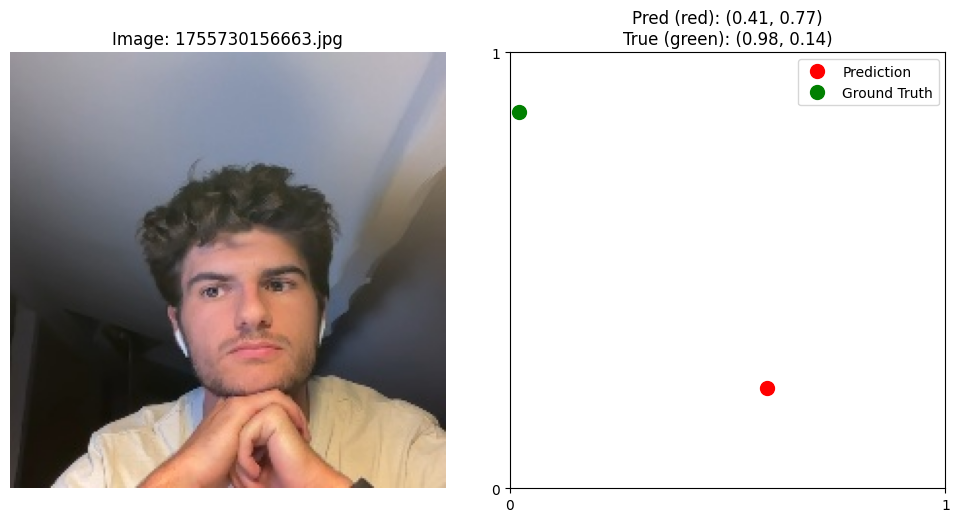

In [3]:
images_to_delete = []

idx = 0
while True:
    img_path = display_image_with_preds(idx)

    choice = input("d (delete) / s (skip) / q (quit)")
    if choice == "d":
        images_to_delete.append(img_path)
    elif choice == "q":
        break

    idx += 1
    
    # Nettoyer l'affichage précédent
    clear_output(wait=True)

In [4]:
print('images_to_delete', images_to_delete)

images_to_delete []


In [5]:
dataset_df = pd.read_csv('dataset.csv')
print('Length of dataset_df', len(dataset_df))

dataset_df[dataset_df['img_filename'].isin(images_to_delete)]
filtered_dataset_df = dataset_df[~dataset_df['img_filename'].isin(images_to_delete)]

filtered_dataset_df.to_csv('dataset_fixed.csv', index=False)
print('Length of filtered_dataset_df', len(filtered_dataset_df))


Length of dataset_df 5467
Length of filtered_dataset_df 5467
